In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import scipy.stats as stats
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as sm
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
df_train=pd.read_csv("train.csv")
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [2]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [3]:
test.shape

(4277, 13)

In [4]:
test1 = pd.read_csv('test.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df_train.shape

(8693, 14)

In [6]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
df = df_train.copy()
df.HomePlanet.value_counts()


Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [8]:
df.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [9]:
df.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [10]:
df.Cabin.value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [11]:
df.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [12]:
df.VRDeck.median()

0.0

In [13]:
df.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [14]:
df.PassengerId.str[:4].value_counts()

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: PassengerId, Length: 6217, dtype: int64

In [15]:
x = df.PassengerId.str[:4].value_counts() > 1
x[x == True].shape


(1412,)

In [16]:
df[['Deck', 'Cabin_Number', 'Cabin_Side']] = df.Cabin.str.split('/', expand=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_Number,Cabin_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [17]:
test[['Deck', 'Cabin_Number', 'Cabin_Side']] = test.Cabin.str.split('/', expand=True)
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Cabin_Number,Cabin_Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


In [18]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Cabin_Number    199
Cabin_Side      199
dtype: int64

In [19]:
df.Deck.value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

In [20]:
df.Cabin_Side.value_counts()

S    4288
P    4206
Name: Cabin_Side, dtype: int64

In [21]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Deck', 'Cabin_Number', 'Cabin_Side'],
      dtype='object')

In [22]:
df.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [23]:
df.loc[df.VIP == True, 'HomePlanet'].value_counts()

Europa    131
Mars       63
Name: HomePlanet, dtype: int64

In [24]:
df.loc[df.VIP == True, 'Destination'].value_counts()

TRAPPIST-1e      114
55 Cancri e       65
PSO J318.5-22     18
Name: Destination, dtype: int64

In [25]:
df.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [26]:
tab = pd.crosstab(df.HomePlanet, df.Destination)
tab

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
HomePlanet,,,
Earth,690,712,3101
Europa,886,19,1189
Mars,193,49,1475


In [27]:
stats.chi2_contingency(tab)

(1144.18502191443,
 2.0026455334311217e-246,
 4,
 array([[ 958.11967765,  422.46090931, 3122.41941304],
        [ 445.54799134,  196.45417368, 1451.99783498],
        [ 365.33233101,  161.08491701, 1190.58275198]]))

In [28]:
x = df.loc[df.HomePlanet.isna(), ['HomePlanet', 'Destination']].isna().sum(axis=1)
x[x > 1]

347     2
5208    2
5687    2
6629    2
dtype: int64

In [29]:
df.loc[((df.HomePlanet.isna()) & (df.Destination == '55 Cancri e')), 'HomePlanet'] = 'Europa'
df.HomePlanet.fillna('Earth', inplace=True)

In [30]:
test.loc[((test.HomePlanet.isna()) & (test.Destination == '55 Cancri e')), 'HomePlanet'] = 'Europa'
test.HomePlanet.fillna('Earth', inplace=True)
df.HomePlanet.isna().sum()

0

In [31]:
df.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [32]:
df.loc[df.CryoSleep.isna(), 'Deck'].value_counts()


F    68
G    63
C    23
E    20
B    19
D    10
A     6
T     1
Name: Deck, dtype: int64

In [33]:
pd.crosstab(df.Deck, df.CryoSleep)

CryoSleep,False,True
Deck,,
A,182,68
B,341,419
C,430,294
D,364,104
E,688,168
F,2176,550
G,1146,1350
T,4,0


In [34]:
pd.crosstab(df.Cabin_Side, df.CryoSleep)

CryoSleep,False,True
Cabin_Side,,
P,2673,1420
S,2658,1533


In [35]:
df.CryoSleep.fillna(False, inplace=True)
test.CryoSleep.fillna(False, inplace=True)
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Deck', 'Cabin_Number', 'Cabin_Side'],
      dtype='object')

In [36]:
df.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [37]:
tab = pd.crosstab(df.HomePlanet, df.Destination)
tab


Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
HomePlanet,,,
Earth,690,728,3251
Europa,917,19,1189
Mars,193,49,1475


In [38]:
df.groupby('Destination')['Deck'].value_counts()

Destination    Deck
55 Cancri e    F        398
               G        365
               B        333
               C        317
               E        116
               D        113
               A        108
PSO J318.5-22  G        461
               F        241
               E         41
               D         17
               C         13
               B          3
               A          2
TRAPPIST-1e    F       2088
               G       1688
               E        696
               B        426
               C        405
               D        338
               A        142
               T          5
Name: Deck, dtype: int64

In [39]:
df.Destination.fillna('TRAPPIST-1e', inplace=True)
test.Destination.fillna('TRAPPIST-1e', inplace=True)
df.Destination.isna().sum()

0

In [40]:
df.Age.describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

/Users/fatimafayha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


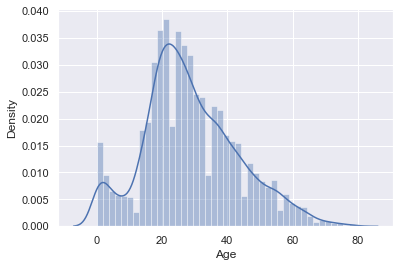

In [41]:
sns.distplot(df.Age)
plt.show()

In [42]:
df[df.Age == 0].shape

df[df.Age < 5]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_Number,Cabin_Side
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True,G,0,P
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False,E,0,S
25,0020_05,Earth,True,E/0/S,PSO J318.5-22,1.0,False,NaN,0.0,0.0,0.0,0.0,Mael Brantuarez,False,E,0,S
34,0031_02,Mars,False,F/9/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Cinets Datie,True,F,9,P
44,0044_02,Earth,True,G/3/P,55 Cancri e,4.0,False,0.0,0.0,0.0,0.0,0.0,Kayne Coopelandez,True,G,3,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,9227_03,Earth,True,G/1498/P,PSO J318.5-22,1.0,False,0.0,0.0,0.0,0.0,0.0,Paulas Hinglendez,True,G,1498,P
8650,9227_04,Earth,True,G/1498/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Robyny Hinglendez,True,G,1498,P
8653,9231_01,Mars,True,F/1888/P,55 Cancri e,2.0,False,0.0,0.0,0.0,0.0,0.0,Denuts Paie,True,F,1888,P
8654,9231_02,Mars,False,F/1888/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Walls Paie,True,F,1888,P


In [43]:
df.groupby('HomePlanet')['Age'].median()

HomePlanet
Earth     24.0
Europa    33.0
Mars      28.0
Name: Age, dtype: float64

In [44]:
df.groupby('Destination')['Age'].median()

Destination
55 Cancri e      28.0
PSO J318.5-22    24.0
TRAPPIST-1e      27.0
Name: Age, dtype: float64

In [45]:
df.PassengerId.str[:4].value_counts()

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: PassengerId, Length: 6217, dtype: int64

In [46]:
df['Group'] = df.PassengerId.str[:4]
x_group = df.Group.value_counts()
df['Group'] = df['Group'].map(x_group)
test['Group'] = test.PassengerId.str[:4]

x_group = test.Group.value_counts()
test['Group'] = test['Group'].map(x_group)
df[df.Age < 5]['Group'].value_counts()

3    188
4     67
2     55
6     50
7     41
5     40
1     17
8      8
Name: Group, dtype: int64

In [47]:
df['Age'] = df.groupby('HomePlanet')['Age'].transform(lambda x:x.replace(np.nan, x.median()))
test['Age'] = test.groupby('HomePlanet')['Age'].transform(lambda x:x.replace(np.nan, x.median()))
df.Age.isna().sum()

0

In [48]:
df.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [49]:
df.groupby('Deck')['VIP'].value_counts()

Deck  VIP  
A     False     215
      True       35
B     False     725
      True       42
C     False     687
      True       41
D     False     438
      True       31
E     False     846
      True       15
F     False    2695
      True       29
G     False    2493
T     False       5
Name: VIP, dtype: int64

In [50]:
df.groupby('Cabin_Side')['VIP'].value_counts()

Cabin_Side  VIP  
P           False    4011
            True      102
S           False    4093
            True       91
Name: VIP, dtype: int64

In [51]:
df.loc[df.VIP.isna(), 'Deck'].value_counts()

F    70
G    66
C    19
E    15
B    12
D     9
A     6
Name: Deck, dtype: int64

In [52]:
df.VIP.fillna(False, inplace=True)
test.VIP.fillna(False, inplace=True)
spend=df.iloc[:,7:12]
spend

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...
8688,0.0,6819.0,0.0,1643.0,74.0
8689,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,1872.0,1.0,0.0
8691,0.0,1049.0,0.0,353.0,3235.0


In [53]:
spend_test=test.iloc[:,7:12]
spend_test

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,0.0,9.0,0.0,2823.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,6652.0,0.0,181.0,585.0
4,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...
4272,0.0,0.0,0.0,0.0,0.0
4273,0.0,847.0,17.0,10.0,144.0
4274,0.0,0.0,0.0,0.0,0.0
4275,0.0,2680.0,0.0,0.0,523.0


In [54]:
pt=PowerTransformer()
spend_trans=pd.DataFrame(pt.fit_transform(spend),columns=["RoomService_trans","FoodCourt_trans","ShoppingMall_trans","Spa_trans","VRDeck_trans"])
spend_trans.reset_index(drop=True,inplace=True)
spend_trans.head()

,RoomService_trans,FoodCourt_trans,ShoppingMall_trans,Spa_trans,VRDeck_trans
0,-0.699294,-0.717494,-0.692680,-0.737298,-0.710182
1,1.426200,0.731535,1.236751,1.539799,1.258226
2,1.271105,1.641673,-0.692680,1.672922,1.279716
3,-0.699294,1.590605,1.611079,1.647562,1.485681
4,1.539479,1.269689,1.532958,1.542173,0.203209


In [55]:
spend_test_trans=pd.DataFrame(pt.transform(spend_test),columns=["RoomService_trans","FoodCourt_trans","ShoppingMall_trans","Spa_trans","VRDeck_trans"])
spend_test_trans.reset_index(drop=True,inplace=True)
spend_test_trans.head()

,RoomService_trans,FoodCourt_trans,ShoppingMall_trans,Spa_trans,VRDeck_trans
0,-0.699294,-0.717494,-0.692680,-0.737298,-0.710182
1,-0.699294,0.731535,-0.692680,1.640531,-0.710182
2,-0.699294,-0.717494,-0.692680,-0.737298,-0.710182
3,-0.699294,1.664115,-0.692680,1.424780,1.585152
4,0.881029,-0.717494,1.644244,-0.737298,-0.710182


In [56]:
df1=pd.concat([df,spend_trans],axis=1)
df1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,Deck,Cabin_Number,Cabin_Side,Group,RoomService_trans,FoodCourt_trans,ShoppingMall_trans,Spa_trans,VRDeck_trans
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,B,0,P,1,-0.699294,-0.717494,-0.692680,-0.737298,-0.710182
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,F,0,S,1,1.426200,0.731535,1.236751,1.539799,1.258226
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,A,0,S,2,1.271105,1.641673,-0.692680,1.672922,1.279716
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,A,0,S,2,-0.699294,1.590605,1.611079,1.647562,1.485681
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,F,1,S,1,1.539479,1.269689,1.532958,1.542173,0.203209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,False,A,98,P,1,-0.699294,1.664905,-0.692680,1.614009,1.354056
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,False,G,1499,S,1,-0.699294,-0.717494,-0.692680,-0.737298,-0.710182
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,True,G,1500,S,1,-0.699294,-0.717494,1.690127,-0.148524,-0.710182
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,False,E,608,S,2,-0.699294,1.577987,-0.692680,1.499796,1.671150


In [57]:
test=pd.concat([test,spend_test_trans],axis=1)
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Deck,Cabin_Number,Cabin_Side,Group,RoomService_trans,FoodCourt_trans,ShoppingMall_trans,Spa_trans,VRDeck_trans
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,Nelly Carsoning,G,3,S,1,-0.699294,-0.717494,-0.692680,-0.737298,-0.710182
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,Lerome Peckers,F,4,S,1,-0.699294,0.731535,-0.692680,1.640531,-0.710182
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,Sabih Unhearfus,C,0,S,1,-0.699294,-0.717494,-0.692680,-0.737298,-0.710182
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,Meratz Caltilter,C,1,S,1,-0.699294,1.664115,-0.692680,1.424780,1.585152
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,Brence Harperez,F,5,S,1,0.881029,-0.717494,1.644244,-0.737298,-0.710182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,...,Jeron Peter,G,1496,S,2,-0.699294,-0.717494,-0.692680,-0.737298,-0.710182
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,...,Matty Scheron,NaN,NaN,NaN,1,-0.699294,1.563472,1.137197,0.773692,1.450806
4274,9271_01,Mars,True,D/296/P,55 Cancri e,27.0,False,0.0,0.0,0.0,...,Jayrin Pore,D,296,P,1,-0.699294,-0.717494,-0.692680,-0.737298,-0.710182
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,32.0,False,0.0,2680.0,0.0,...,Kitakan Conale,D,297,P,1,-0.699294,1.629274,-0.692680,-0.737298,1.577065


In [58]:
df1.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Deck', 'Cabin_Number', 'Cabin_Side', 'Group',
       'RoomService_trans', 'FoodCourt_trans', 'ShoppingMall_trans',
       'Spa_trans', 'VRDeck_trans'],
      dtype='object')

In [59]:
df1.RoomService_trans.describe()

count    8.512000e+03
mean     5.227126e-16
std      1.000059e+00
min     -6.992939e-01
25%     -6.992939e-01
50%     -6.992939e-01
75%      1.288623e+00
max      1.705347e+00
Name: RoomService_trans, dtype: float64

In [60]:
mod=sm.ols("RoomService_trans ~ HomePlanet",data=df1).fit()
anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
HomePlanet,2.0,692.668304,346.334152,376.880968,1.481534e-157
Residual,8509.0,7819.331696,0.918948,NaN,NaN


In [61]:
df1.groupby('HomePlanet')['RoomService_trans'].mean()

HomePlanet
Earth    -0.011868
Europa   -0.367254
Mars      0.485065
Name: RoomService_trans, dtype: float64

In [62]:
df1['RoomService_trans'] = df1.groupby('HomePlanet')['RoomService_trans'].transform(lambda x:x.replace(np.nan, x.mean()))
test['RoomService_trans'] = test.groupby('HomePlanet')['RoomService_trans'].transform(lambda x:x.replace(np.nan, x.mean()))
df1.RoomService_trans.isna().sum()

0

In [63]:
df1.FoodCourt_trans.describe()

count    8.510000e+03
mean     2.124688e-16
std      1.000059e+00
min     -7.174945e-01
25%     -7.174945e-01
50%     -7.174945e-01
75%      1.284375e+00
max      1.700598e+00
Name: FoodCourt_trans, dtype: float64

In [64]:
mod=sm.ols("FoodCourt_trans ~ HomePlanet",data=df1).fit()
anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
HomePlanet,2.0,726.903087,363.451544,397.256043,1.152158e-165
Residual,8507.0,7783.096913,0.914905,NaN,NaN


In [65]:
df1.groupby('HomePlanet')['FoodCourt_trans'].mean()


HomePlanet
Earth    -0.039391
Europa    0.436139
Mars     -0.429284
Name: FoodCourt_trans, dtype: float64

In [66]:
df1['FoodCourt_trans'] = df1.groupby('HomePlanet')['FoodCourt_trans'].transform(lambda x:x.replace(np.nan, x.mean()))
test['FoodCourt_trans'] = test.groupby('HomePlanet')['FoodCourt_trans'].transform(lambda x:x.replace(np.nan, x.mean()))
df1.FoodCourt_trans.isna().sum()

0

In [67]:
df1.ShoppingMall_trans.describe()

count    8.485000e+03
mean     2.948731e-16
std      1.000059e+00
min     -6.926804e-01
25%     -6.926804e-01
50%     -6.926804e-01
75%      1.254794e+00
max      1.737999e+00
Name: ShoppingMall_trans, dtype: float64

In [68]:
mod=sm.ols("ShoppingMall_trans ~ HomePlanet",data=df1).fit()
anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
HomePlanet,2.0,470.763711,235.381856,249.120294,7.359803e-106
Residual,8482.0,8014.236289,0.944852,NaN,NaN


In [69]:
df1.groupby('HomePlanet')['ShoppingMall_trans'].median()

HomePlanet
Earth    -0.69268
Europa   -0.69268
Mars     -0.69268
Name: ShoppingMall_trans, dtype: float64

In [70]:
df1.groupby('HomePlanet')['ShoppingMall_trans'].mean()

HomePlanet
Earth     0.025040
Europa   -0.345288
Mars      0.354591
Name: ShoppingMall_trans, dtype: float64

In [71]:
df1['ShoppingMall_trans'] = df1.groupby('HomePlanet')['ShoppingMall_trans'].transform(lambda x:x.replace(np.nan, x.mean()))
test['ShoppingMall_trans'] = test.groupby('HomePlanet')['ShoppingMall_trans'].transform(lambda x:x.replace(np.nan, x.mean()))
df1.ShoppingMall_trans.isna().sum()


0

In [72]:
df1.Spa_trans.describe()

count    8.510000e+03
mean    -2.924153e-16
std      1.000059e+00
min     -7.372984e-01
25%     -7.372984e-01
50%     -7.372984e-01
75%      1.247187e+00
max      1.703168e+00
Name: Spa_trans, dtype: float64

In [73]:
mod=sm.ols("Spa_trans ~ HomePlanet",data=df1).fit()
anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
HomePlanet,2.0,242.968328,121.484164,125.010502,3.098461e-54
Residual,8507.0,8267.031672,0.971792,NaN,NaN


In [74]:
df1.groupby('HomePlanet')['Spa_trans'].median()

HomePlanet
Earth    -0.737298
Europa   -0.737298
Mars     -0.737298
Name: Spa_trans, dtype: float64

In [75]:
df1.groupby('HomePlanet')['Spa_trans'].mean()

HomePlanet
Earth    -0.045775
Europa    0.272235
Mars     -0.210420
Name: Spa_trans, dtype: float64

In [76]:
df1['Spa_trans'] = df1.groupby('HomePlanet')['Spa_trans'].transform(lambda x:x.replace(np.nan, x.mean()))
test['Spa_trans'] = test.groupby('HomePlanet')['Spa_trans'].transform(lambda x:x.replace(np.nan, x.mean()))
df1.Spa_trans.isna().sum()

0

In [77]:
df1.VRDeck_trans.describe()

count    8.505000e+03
mean    -1.231754e-16
std      1.000059e+00
min     -7.101820e-01
25%     -7.101820e-01
50%     -7.101820e-01
75%      1.267211e+00
max      1.717690e+00
Name: VRDeck_trans, dtype: float64

In [78]:
mod=sm.ols("VRDeck_trans ~ HomePlanet",data=df1).fit()
anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
HomePlanet,2.0,502.428999,251.214500,266.892437,3.830293e-113
Residual,8502.0,8002.571001,0.941257,NaN,NaN


In [79]:
df1.groupby('HomePlanet')['VRDeck_trans'].median()

HomePlanet
Earth    -0.710182
Europa   -0.710182
Mars     -0.710182
Name: VRDeck_trans, dtype: float64

In [80]:
df1.groupby('HomePlanet')['VRDeck_trans'].mean()

HomePlanet
Earth     0.000411
Europa    0.324719
Mars     -0.402292
Name: VRDeck_trans, dtype: float64

In [81]:
df1['VRDeck_trans'] = df1.groupby('HomePlanet')['VRDeck_trans'].transform(lambda x:x.replace(np.nan, x.mean()))
test['VRDeck_trans'] = test.groupby('HomePlanet')['VRDeck_trans'].transform(lambda x:x.replace(np.nan, x.mean()))
df1.VRDeck_trans.isna().sum()

0

In [82]:
df1.isna().sum()

PassengerId             0
HomePlanet              0
CryoSleep               0
Cabin                 199
Destination             0
Age                     0
VIP                     0
RoomService           181
FoodCourt             183
ShoppingMall          208
Spa                   183
VRDeck                188
Name                  200
Transported             0
Deck                  199
Cabin_Number          199
Cabin_Side            199
Group                   0
RoomService_trans       0
FoodCourt_trans         0
ShoppingMall_trans      0
Spa_trans               0
VRDeck_trans            0
dtype: int64

In [83]:
df1.Deck.value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

In [84]:
df1.groupby('HomePlanet')['Deck'].value_counts()

HomePlanet  Deck
Earth       G       2553
            F       1680
            E        414
            C          9
            B          8
            D          6
            A          2
            T          1
Europa      B        771
            C        738
            A        254
            D        190
            E        132
            G          6
            F          4
            T          4
Mars        F       1110
            E        330
            D        282
Name: Deck, dtype: int64

In [85]:
df1.loc[df1.Deck.isna(), 'HomePlanet'].value_counts()

Earth     99
Europa    63
Mars      37
Name: HomePlanet, dtype: int64

In [86]:
df1['Deck'] = df1.groupby('HomePlanet')['Deck'].transform(lambda x:x.replace(np.nan, x.mode()[0]))
test['Deck'] = test.groupby('HomePlanet')['Deck'].transform(lambda x:x.replace(np.nan, x.mode()[0]))

In [87]:
df1.Cabin_Number.nunique()

1817

In [88]:
x_temp = df1.loc[df1.Cabin.isna(), 'Group']
x_temp[x_temp > 1]

103     4
227     2
251     2
260     2
314     2
       ..
8202    7
8209    2
8475    2
8485    5
8509    8
Name: Group, Length: 100, dtype: int64

In [89]:
df1['Group_name'] = df1.PassengerId.str[:4]
df1.groupby('Group_name')['Cabin'].transform(lambda x:x.replace(np.nan, ))

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [90]:
df1.loc[df1.Cabin.isna(), 'Group_name'].nunique()


199

In [91]:
df1.Cabin_Side.value_counts()

S    4288
P    4206
Name: Cabin_Side, dtype: int64

In [92]:
df1.groupby('HomePlanet')['Cabin_Side'].value_counts()

HomePlanet  Cabin_Side
Earth       P             2349
            S             2324
Europa      S             1130
            P              969
Mars        P              888
            S              834
Name: Cabin_Side, dtype: int64

In [93]:
df1.groupby('Destination')['Cabin_Side'].value_counts()


Destination    Cabin_Side
55 Cancri e    S              906
               P              844
PSO J318.5-22  P              393
               S              385
TRAPPIST-1e    S             2997
               P             2969
Name: Cabin_Side, dtype: int64

In [94]:
df1.groupby('VIP')['Cabin_Side'].value_counts()

VIP    Cabin_Side
False  S             4197
       P             4104
True   P              102
       S               91
Name: Cabin_Side, dtype: int64

In [95]:
pd.options.display.max_columns = None
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_Number,Cabin_Side,Group,RoomService_trans,FoodCourt_trans,ShoppingMall_trans,Spa_trans,VRDeck_trans,Group_name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,1,-0.699294,-0.717494,-0.692680,-0.737298,-0.710182,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,1,1.426200,0.731535,1.236751,1.539799,1.258226,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,2,1.271105,1.641673,-0.692680,1.672922,1.279716,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,2,-0.699294,1.590605,1.611079,1.647562,1.485681,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1,1.539479,1.269689,1.532958,1.542173,0.203209,0004


In [96]:
import random
df1.loc[df1.Cabin_Side.isna(), 'Cabin_Side'] = random.choices(list(df1.Cabin_Side.dropna()), k=199)
test.Cabin_Side.isna().sum()

100

In [97]:
test.loc[test.Cabin_Side.isna(), 'Cabin_Side'] = random.choices(list(test.Cabin_Side.dropna()), k=100)
df1.Cabin_Side.value_counts()

S    4387
P    4306
Name: Cabin_Side, dtype: int64

In [98]:
df1.isna().sum()

PassengerId             0
HomePlanet              0
CryoSleep               0
Cabin                 199
Destination             0
Age                     0
VIP                     0
RoomService           181
FoodCourt             183
ShoppingMall          208
Spa                   183
VRDeck                188
Name                  200
Transported             0
Deck                    0
Cabin_Number          199
Cabin_Side              0
Group                   0
RoomService_trans       0
FoodCourt_trans         0
ShoppingMall_trans      0
Spa_trans               0
VRDeck_trans            0
Group_name              0
dtype: int64

In [99]:
df2=df1.drop(['PassengerId','Cabin','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name','Cabin_Number','Group_name'],
            axis=1)
test=test.drop(['PassengerId','Cabin','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name','Cabin_Number'],
            axis=1)
df2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Cabin_Side,Group,RoomService_trans,FoodCourt_trans,ShoppingMall_trans,Spa_trans,VRDeck_trans
0,Europa,False,TRAPPIST-1e,39.0,False,False,B,P,1,-0.699294,-0.717494,-0.692680,-0.737298,-0.710182
1,Earth,False,TRAPPIST-1e,24.0,False,True,F,S,1,1.426200,0.731535,1.236751,1.539799,1.258226
2,Europa,False,TRAPPIST-1e,58.0,True,False,A,S,2,1.271105,1.641673,-0.692680,1.672922,1.279716
3,Europa,False,TRAPPIST-1e,33.0,False,False,A,S,2,-0.699294,1.590605,1.611079,1.647562,1.485681
4,Earth,False,TRAPPIST-1e,16.0,False,True,F,S,1,1.539479,1.269689,1.532958,1.542173,0.203209


In [100]:
num_df2= df2.select_dtypes(include=np.number)
cat_df2=df2.select_dtypes(exclude=np.number)
num_test= test.select_dtypes(include=np.number)
cat_test=test.select_dtypes(exclude=np.number)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_num_df2=sc.fit_transform(num_df2)
scaled_num=pd.DataFrame(data=scaled_num_df2, columns=num_df2.columns)
scaled_num_test=sc.fit_transform(num_test)
scaled_num_test=pd.DataFrame(data=scaled_num_test, columns=num_test.columns)
scaled_num.shape

(8693, 7)

In [101]:
cat_df2.head()

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,Cabin_Side
0,Europa,False,TRAPPIST-1e,False,False,B,P
1,Earth,False,TRAPPIST-1e,False,True,F,S
2,Europa,False,TRAPPIST-1e,True,False,A,S
3,Europa,False,TRAPPIST-1e,False,False,A,S
4,Earth,False,TRAPPIST-1e,False,True,F,S


In [102]:
cat_dummy=pd.get_dummies(cat_df2,drop_first=True)
cat_dummy_test=pd.get_dummies(cat_test,drop_first=True)
cat_dummy.drop(['CryoSleep','VIP','Transported'],axis=1,inplace=True)
cat_dummy_test.drop(['CryoSleep','VIP'],axis=1,inplace=True)
cat_dummy.shape

(8693, 12)

In [103]:
boolean= df2[['CryoSleep','VIP', 'Transported']]
boolean_test= test[['CryoSleep','VIP']]
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
Bool=lb.fit_transform(boolean)
Bool_trans=pd.DataFrame(Bool,columns=boolean.columns)
Bool_test=lb.fit_transform(boolean_test)
Bool_test=pd.DataFrame(Bool_test,columns=boolean_test.columns)
df.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [104]:
final=pd.concat([scaled_num,cat_dummy,Bool_trans],axis=1)
test = pd.concat([scaled_num_test,cat_dummy_test,Bool_test],axis=1)
test.shape

(4277, 21)

In [105]:
final.head()

,Age,Group,RoomService_trans,FoodCourt_trans,ShoppingMall_trans,Spa_trans,VRDeck_trans,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Cabin_Side_S,CryoSleep,VIP,Transported
0,0.711088,-0.648735,-0.706432,-0.724474,-0.700275,-0.744959,-0.717136,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,-0.334213,-0.648735,1.439843,0.738686,1.251379,1.555797,1.271715,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
2,2.035136,-0.022268,1.283232,1.657699,-0.700275,1.690302,1.293428,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,0.292968,-0.022268,-0.706432,1.606133,1.630019,1.664679,1.501532,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,-0.891706,-0.648735,1.554230,1.282088,1.550998,1.558195,0.205741,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


In [106]:
final.isnull().sum()

Age                          0
Group                        0
RoomService_trans            0
FoodCourt_trans              0
ShoppingMall_trans           0
Spa_trans                    0
VRDeck_trans                 0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Cabin_Side_S                 0
CryoSleep                    0
VIP                          0
Transported                  0
dtype: int64

In [107]:
X = final.drop('Transported', axis=1)
y = final.Transported
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
xtrain.shape, xtest.shape

((6954, 21), (1739, 21))

In [108]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
print(lr.score(xtrain, ytrain), lr.score(xtest, ytest))

lr_train = lr.predict(xtrain)
print(confusion_matrix(lr_train, ytrain))
print(classification_report(lr_train, ytrain))

lr_test = lr.predict(xtest)
print(confusion_matrix(lr_test, ytest))
print(classification_report(lr_test, ytest))

0.7599942479148691 0.7619321449108684
[[2658  873]
 [ 796 2627]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      3531
           1       0.75      0.77      0.76      3423

    accuracy                           0.76      6954
   macro avg       0.76      0.76      0.76      6954
weighted avg       0.76      0.76      0.76      6954

[[652 205]
 [209 673]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       857
           1       0.77      0.76      0.76       882

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739



In [109]:
dtree = DecisionTreeClassifier(max_depth=7, random_state=42)
dtree.fit(xtrain, ytrain)
print(dtree.score(xtrain, ytrain), dtree.score(xtest, ytest))

dtree_train = dtree.predict(xtrain)
print(confusion_matrix(dtree_train, ytrain))
print(classification_report(dtree_train, ytrain))

dtree_test = dtree.predict(xtest)
print(confusion_matrix(dtree_test, ytest))
print(classification_report(dtree_test, ytest))

0.8061547310900201 0.765382403680276
[[2839  733]
 [ 615 2767]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      3572
           1       0.79      0.82      0.80      3382

    accuracy                           0.81      6954
   macro avg       0.81      0.81      0.81      6954
weighted avg       0.81      0.81      0.81      6954

[[669 216]
 [192 662]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       885
           1       0.75      0.78      0.76       854

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



In [110]:
rf = RandomForestClassifier(random_state=42, max_depth=8)
rf.fit(xtrain, ytrain)
print(rf.score(xtrain, ytrain), rf.score(xtest, ytest))

rf_train = rf.predict(xtrain)
print(confusion_matrix(rf_train, ytrain))
print(classification_report(rf_train, ytrain))

rf_test = rf.predict(xtest)
print(confusion_matrix(rf_test, ytest))
print(classification_report(rf_test, ytest))

0.8275812482024734 0.7866589994249569
[[2787  532]
 [ 667 2968]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      3319
           1       0.85      0.82      0.83      3635

    accuracy                           0.83      6954
   macro avg       0.83      0.83      0.83      6954
weighted avg       0.83      0.83      0.83      6954

[[646 156]
 [215 722]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       802
           1       0.82      0.77      0.80       937

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [111]:
pred1 = rf.predict(test)
pred1 = [True if x == 1 else False for x in pred1]
pred1_df = pd.DataFrame({'PassengerId':test1.PassengerId, 'Transported':pred1})
pred1_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [112]:
pred1_df.to_csv('sub1.csv', index=False)

In [113]:
param={"criterion":["gini","entropy"],
      "max_depth":[4,5,6,7,8,9,10],
      "n_estimators":np.arange(50,400,50)}

rf=RandomForestClassifier(random_state=42)

rf_cv=GridSearchCV(estimator=rf,param_grid=param,cv=5,scoring="accuracy")
rf_cv.fit(xtrain,ytrain)
rf_cv.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 350}

In [114]:
rf = RandomForestClassifier(n_estimators=300,random_state=42, max_depth=10,criterion="entropy")
rf.fit(xtrain, ytrain)
print(rf.score(xtrain, ytrain), rf.score(xtest, ytest))

rf_train = rf.predict(xtrain)
print(confusion_matrix(rf_train, ytrain))
print(classification_report(rf_train, ytrain))

rf_test = rf.predict(xtest)
print(confusion_matrix(rf_test, ytest))
print(classification_report(rf_test, ytest))

0.8534656312913431 0.7918343875790684
[[2885  450]
 [ 569 3050]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      3335
           1       0.87      0.84      0.86      3619

    accuracy                           0.85      6954
   macro avg       0.85      0.85      0.85      6954
weighted avg       0.85      0.85      0.85      6954

[[656 157]
 [205 721]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       813
           1       0.82      0.78      0.80       926

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [115]:
pred2 = rf.predict(test)
pred2 = [True if x == 1 else False for x in pred2]
pred2_df = pd.DataFrame({'PassengerId':test1.PassengerId, 'Transported':pred2})
pred2_df.to_csv('sub2.csv', index=False)

In [116]:
pd.DataFrame({'Feat':xtrain.columns, 'Imp':rf.feature_importances_}).sort_values(by='Imp', ascending=False)

,Feat,Imp
5,Spa_trans,0.148136
19,CryoSleep,0.134881
6,VRDeck_trans,0.130415
2,RoomService_trans,0.124655
3,FoodCourt_trans,0.096008
4,ShoppingMall_trans,0.074903
0,Age,0.061261
7,HomePlanet_Europa,0.045044
16,Deck_G,0.029568
1,Group,0.023700


In [117]:
xtrain1 = xtrain.drop(['Destination_TRAPPIST-1e', 'Destination_PSO J318.5-22', 'VIP', 'Deck_T', 'Deck_D'], axis=1)
xtest1 = xtest.drop(['Destination_TRAPPIST-1e', 'Destination_PSO J318.5-22', 'VIP', 'Deck_T', 'Deck_D'], axis=1)
rf = RandomForestClassifier(n_estimators=250,random_state=42, max_depth=8,criterion="entropy")
rf.fit(xtrain1, ytrain)
print(rf.score(xtrain1, ytrain), rf.score(xtest1, ytest))

rf_train = rf.predict(xtrain1)
print(confusion_matrix(rf_train, ytrain))
print(classification_report(rf_train, ytrain))

rf_test = rf.predict(xtest1)
print(confusion_matrix(rf_test, ytest))
print(classification_report(rf_test, ytest))

0.8281564567155594 0.7901092581943646
[[2774  515]
 [ 680 2985]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      3289
           1       0.85      0.81      0.83      3665

    accuracy                           0.83      6954
   macro avg       0.83      0.83      0.83      6954
weighted avg       0.83      0.83      0.83      6954

[[645 149]
 [216 729]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       794
           1       0.83      0.77      0.80       945

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [118]:
pred3 = rf.predict(test.drop(['Destination_TRAPPIST-1e', 'Destination_PSO J318.5-22', 'VIP', 'Deck_T', 'Deck_D'], axis=1))
pred3 = [True if x == 1 else False for x in pred3]
pred3_df = pd.DataFrame({'PassengerId':test1.PassengerId, 'Transported':pred3})
pred3_df.to_csv('sub3.csv', index=False)